# Fraud Detection with Machine Learning

Machine learning for fraud detection works on the basis of large, historical datasets that have been aggregated across many clients. The data serve as the training set and allow businesses to build efficient machine-learning-based fraud detection systems with optimized performance. Compared to standard predictive modeling problem, fraud detection is characterized with skewed class distribution, or class imbalance, since fraud is a relatively rare event. Therefore, one challenge of fraud detection with Machine Learning is to mitigate the class imbalance problem.  

The goal of this project is to build supervised classification model for fraud detection using preprocessed and anonymized credit card transaction data. The main focus will be on dealing with class imbalance. 

## Environment Set Up

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('white')

from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
%reload_ext version_information
%version_information numpy, pandas, matplotlib, seaborn, sklearn, keras

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.1.0
OS Darwin 16.1.0 x86_64 i386 64bit
numpy 1.11.1
pandas 0.18.1
matplotlib 1.5.3
seaborn 0.7.1
sklearn 0.17.1
keras 2.0.3
Tue May 23 14:46:45 2017 PDT

## Analysis

### Data Exploration

In [4]:
data = pd.read_csv('creditcard.csv')
print(data.shape)
data.head()

(284807, 30)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 30 columns):
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26       284807 non-null float64
V27  

In [6]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,3.923752e-15,5.559442e-16,-8.769520e-15,2.759583e-15,-1.549320e-15,2.005278e-15,-1.695447e-15,-1.933764e-16,-3.136288e-15,1.771777e-15,...,1.540693e-16,7.961936e-16,5.402018e-16,4.459446e-15,1.446667e-15,1.705578e-15,-3.668456e-16,-1.203990e-16,88.349619,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# class distribution
print('There are {} frauds out of {} transactions.'.format(data.Class.sum(), data.shape[0]))
print('The percentage of fraudulent transactions is {:.3f}%.'.format(100*data.Class.sum()/data.shape[0]))

There are 492 frauds out of 284807 transactions.
The percentage of fraudulent transactions is 0.173%.


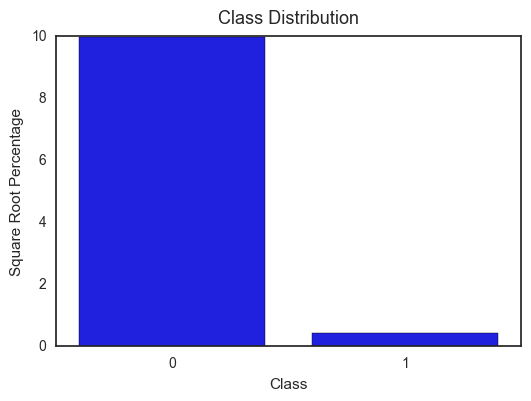

In [8]:
ax = sns.barplot(x='Class', y='Class', data=data, estimator=lambda x: np.sqrt(100*len(x)/len(data)), color='blue')
ax.set(ylabel="Square Root Percentage")
plt.title('Class Distribution', y=1.02, fontsize=13)

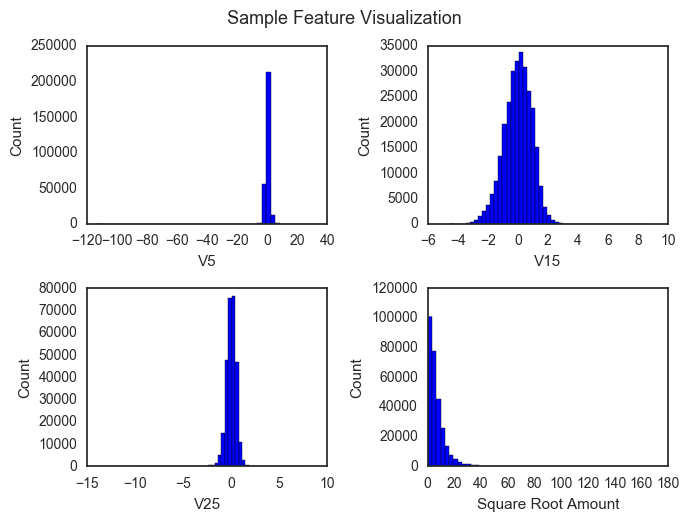

In [28]:
# visualization of some one of the features
fig = plt.figure(figsize=(7, 5))
ax1 = fig.add_subplot(221)
sns.distplot(data['V5'], hist_kws={'color': 'blue', 'alpha': 1}, kde=False, ax=ax1)
ax1.set_ylabel('Count')

ax2 = fig.add_subplot(222)
sns.distplot(data['V15'], hist_kws={'color': 'blue', 'alpha': 1}, kde=False, ax=ax2)
ax2.set_ylabel('Count')

ax3 = fig.add_subplot(223)
sns.distplot(data['V25'], hist_kws={'color': 'blue', 'alpha': 1}, kde=False, ax=ax3)
ax3.set_ylabel('Count')

ax4 = fig.add_subplot(224)
sns.distplot(np.sqrt(data['Amount']), hist_kws={'color': 'blue', 'alpha': 1}, kde=False, ax=ax4)
ax4.set_xlabel('Square Root Amount')
ax4.set_ylabel('Count')

plt.tight_layout()
plt.suptitle('Sample Feature Visualization', fontsize=13, y=1.03)

### Models

In [32]:
features = data.drop(['Class'], axis=1)
label = data['Class']

In [33]:
# split training, test sets
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)
print("Training size: {} rows".format(X_train.shape[0]))
print("Test size: {} rows".format(X_test.shape[0]))

Training size: 227845 rows
Test size: 56962 rows


In [35]:
# normalize features
standardizer = StandardScaler()
X_train = standardizer.fit_transform(X_train)
X_test = standardizer.transform(X_test)

In [59]:
# models for test
models = []
models.append(('LR', LogisticRegression(random_state=0)))
models.append(('SVC', SVC(random_state=0)))
models.append(('CART', DecisionTreeClassifier(random_state=0)))
models.append(('RF', RandomForestClassifier(random_state=0)))

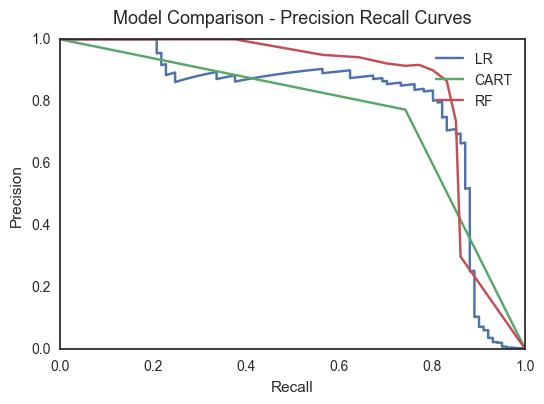

In [60]:
for label, model in models:
    clf = model.fit(X_train, y_train)
    pred = clf.predict(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, pred)
    plt.plot(recall, precision, label=label)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
plt.legend()
plt.title('Model Comparison - Precision Recall Curves', fontsize=13, y=1.03)

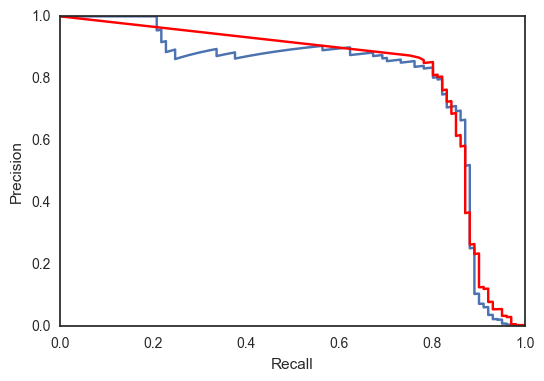

In [90]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
pred_proba = clf.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[:, 1])
plt.plot(recall, precision, label=label)
clf = LogisticRegression(random_state=0, class_weight='balanced').fit(X_train, y_train)
pred_proba = clf.predict_proba(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, pred_proba[:, 1])
plt.plot(recall, precision, color='red', label=label)
plt.xlabel('Recall')
plt.ylabel('Precision')

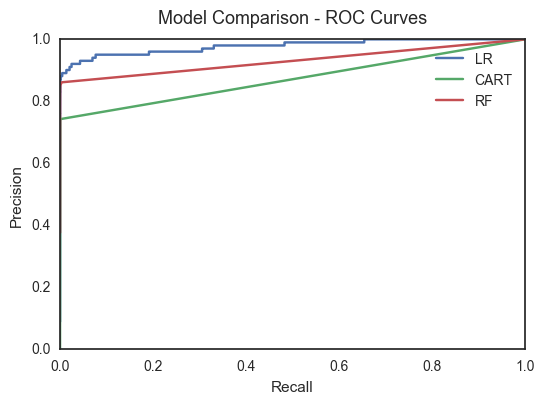

In [64]:
for label, model in models:
    clf = model.fit(X_train, y_train)
    pred_proba = clf.predict_proba(X_test)
    fp, tp, thresholds = roc_curve(y_test, pred_proba[:, 1])
    plt.plot(fp, tp, label=label)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
plt.legend()
plt.title('Model Comparison - ROC Curves', fontsize=13, y=1.03)

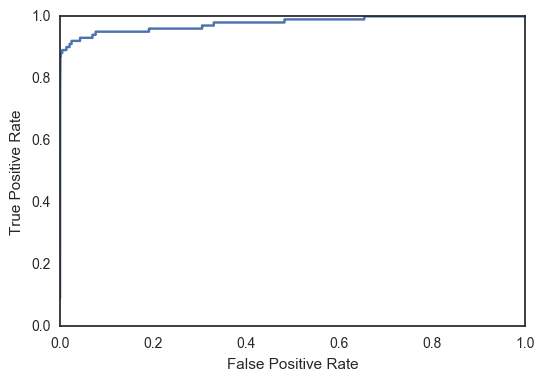

In [71]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
pred_proba = clf.predict_proba(X_test)
fpr, tpr, thresholds = roc_curve(y_test, pred_proba[:, 1])
plt.plot(fpr, tpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [76]:
roc_auc_score(y_test, pred_proba[:, 1])

0.97792123261850461

In [68]:
thresholds

array([  9.99999976e-01,   9.99999957e-01,   9.99999920e-01, ...,
         2.13593469e-07,   1.50234031e-07,   2.72412108e-12])

In [79]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import make_scorer
def auc_score(y_test, y_pred):
    return roc_auc_score(y_test, y_pred, beta=2)
auc = make_scorer(auc_score)

In [60]:
import keras.backend as K

def recall(y_true, y_pred):

    # Count positive samples.
    c1 = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    c2 = K.sum(K.round(K.clip(y_pred, 0, 1)))
    c3 = K.sum(K.round(K.clip(y_true, 0, 1)))

    # If there are no true samples, fix the F1 score at 0.
    if c3 == 0:
        return 0

    # How many selected items are relevant?
    precision = c1 / c2

    # How many relevant items are selected?
    recall = c1 / c3

    # Calculate f1_score
    f1score = 2 * (precision * recall) / (precision + recall)
    return recall


recall = TP / (TP + FN)

In [84]:
ANN = Sequential()
ANN.add(Dense(15, activation='relu', input_dim=29))
ANN.add(Dropout(0.1))
ANN.add(Dense(15, activation='relu'))
ANN.add(Dropout(0.1))
ANN.add(Dense(1, activation='sigmoid'))
ANN.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [85]:
ANN.fit(X_train, y_train, batch_size=32, epochs = 10)

Epoch 1/10
227845/227845 [==============================] - 13s - loss: 0.0143 - acc: 0.9982    
Epoch 2/10
227845/227845 [==============================] - 13s - loss: 0.0090 - acc: 0.9993    
Epoch 3/10
227845/227845 [==============================] - 13s - loss: 0.0091 - acc: 0.9993    
Epoch 4/10
227845/227845 [==============================] - 13s - loss: 0.0093 - acc: 0.9993    
Epoch 5/10
227845/227845 [==============================] - 14s - loss: 0.0089 - acc: 0.9994    
Epoch 6/10
227845/227845 [==============================] - 15s - loss: 0.0090 - acc: 0.9994    
Epoch 7/10
227845/227845 [==============================] - 14s - loss: 0.0088 - acc: 0.9994    
Epoch 8/10
227845/227845 [==============================] - 14s - loss: 0.0085 - acc: 0.9994    
Epoch 9/10
227845/227845 [==============================] - 14s - loss: 0.0087 - acc: 0.9994    
Epoch 10/10
227845/227845 [==============================] - 15s - loss: 0.0089 - acc: 0.9994    


In [86]:
pred = ANN.predict(X_test)

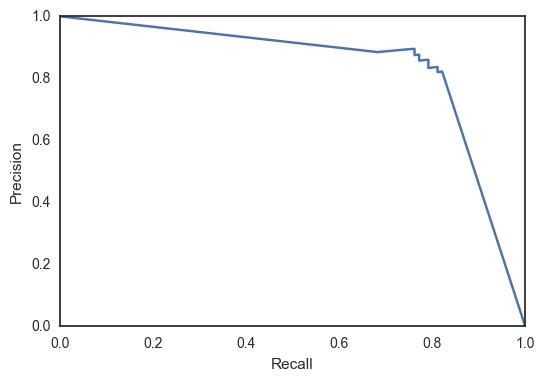

In [89]:
precision, recall, thresholds = precision_recall_curve(y_test, pred)
plt.plot(recall, precision, label=label)
plt.xlabel('Recall')
plt.ylabel('Precision')

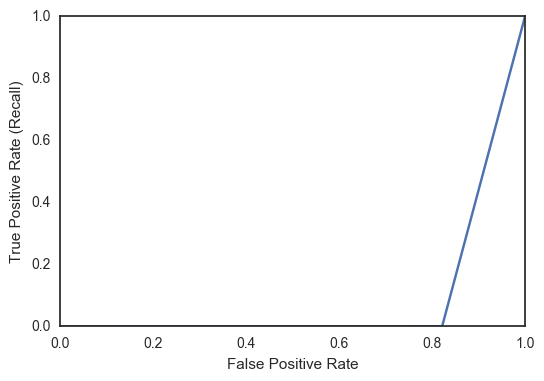

In [92]:
fpr, tpr, thresholds = roc_curve(y_test, pred)
plt.plot(tpr, fpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')

In [77]:
confusion_matrix(y_test, pred_label)

array([[56848,    13],
       [   19,    82]])

In [78]:
82/(82 + 19)

0.8118811881188119

In [83]:
from unbalanced_dataset import UnderSampler

ImportError: No module named 'unbalanced_dataset'